In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.drop(columns=['Name','PassengerId','Ticket','Cabin'],inplace=True,errors='ignore')
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
#handling the missing
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.info()
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [7]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Embarked'].value_counts()


Embarked
2    646
0    168
1     77
Name: count, dtype: int64

<Axes: >

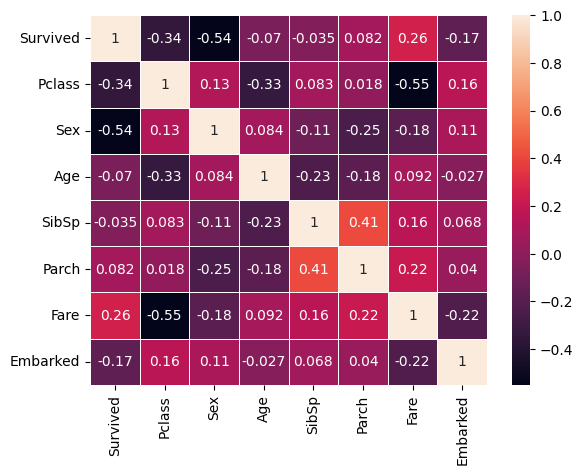

In [8]:
cor_mat = data.corr()
sns.heatmap(cor_mat,annot=True,linewidths=0.5)

<Axes: >

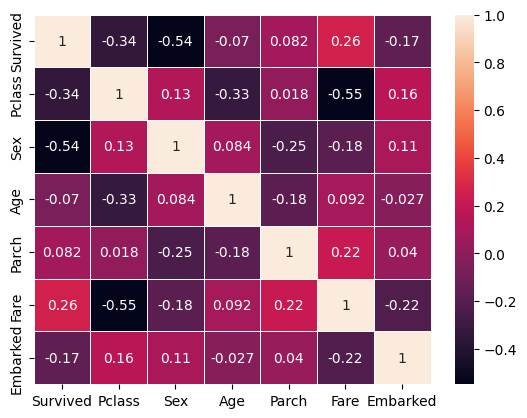

In [9]:
data.drop(columns=['SibSp'],inplace=True,errors='ignoew')
sns.heatmap(data.corr(),annot=True,linewidths=0.5)

In [10]:
y=data.iloc[:,0]
x=data.iloc[:,1:]
y=y.values.ravel()
from sklearn.feature_selection import SelectKBest,chi2
k_best = SelectKBest(chi2,k=3)
best_features = k_best.fit_transform(x,y)
x=x.iloc[:,k_best.get_support()]
x

,Pclass,Sex,Fare
0,3,1,7.2500
1,1,0,71.2833
2,3,0,7.9250
3,1,0,53.1000
4,3,1,8.0500
...,...,...,...
886,2,1,13.0000
887,1,0,30.0000
888,3,0,23.4500
889,1,1,30.0000


In [11]:
# naive bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

model = GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.7761194029850746


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import math

models = {
    "DT" : DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN":KNeighborsClassifier()
}

params = {
    "DT": {
        "criterion":["gini","entropy"],
        "max_depth":[2,5,7,9],
    },
    "SVM" : {
        "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
        "C":[0.01,0.1,1,0.05,0.5]
    },
    "KNN" : {
        "n_neighbors":[15,25,35,int(math.sqrt(len(x)))],
        "weights":["distance","uniform"]
    }
}

best_models = {}

for algo in models:
    grid = GridSearchCV(estimator=models[algo],param_grid=params[algo],cv=5,scoring='accuracy',n_jobs=-1)
    grid.fit(x_train, y_train)
    best_models[algo] = grid.best_estimator_
    
best_models

{'DT': DecisionTreeClassifier(criterion='entropy', max_depth=5),
 'SVM': SVC(C=0.1, kernel='linear'),
 'KNN': KNeighborsClassifier(n_neighbors=35, weights='distance')}

In [13]:
trained_models = {}
for tunned in best_models:
    model = best_models[tunned]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Accuracy Score of {tunned} : ",accuracy_score(y_test,y_pred))
    trained_models[tunned]=model

trained_models

Accuracy Score of DT :  0.8059701492537313
Accuracy Score of SVM :  0.7873134328358209
Accuracy Score of KNN :  0.7985074626865671


{'DT': DecisionTreeClassifier(criterion='entropy', max_depth=5),
 'SVM': SVC(C=0.1, kernel='linear'),
 'KNN': KNeighborsClassifier(n_neighbors=35, weights='distance')}

In [14]:
pclass = int(input("Enter the pclass 1 to 3"))
sex =  int(input('Enter the sex : 0 for female, 1 for male'))
fare = float(input('Enter the fare'))

customData = pd.DataFrame([[pclass,sex,fare]],columns=x_train.columns)
customData

for model in trained_models:
    result = trained_models[model].predict(customData)
    print(f"Result of {model}:",result[0])

Result of DT: 0
Result of SVM: 0
Result of KNN: 1
